Loading dataset...
Dataset loaded successfully!

Dataset preview:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  

Dataset shape: (48842, 7)

Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_level']

Missing values:
age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

Data preprocessing...

Couldn't identify target column

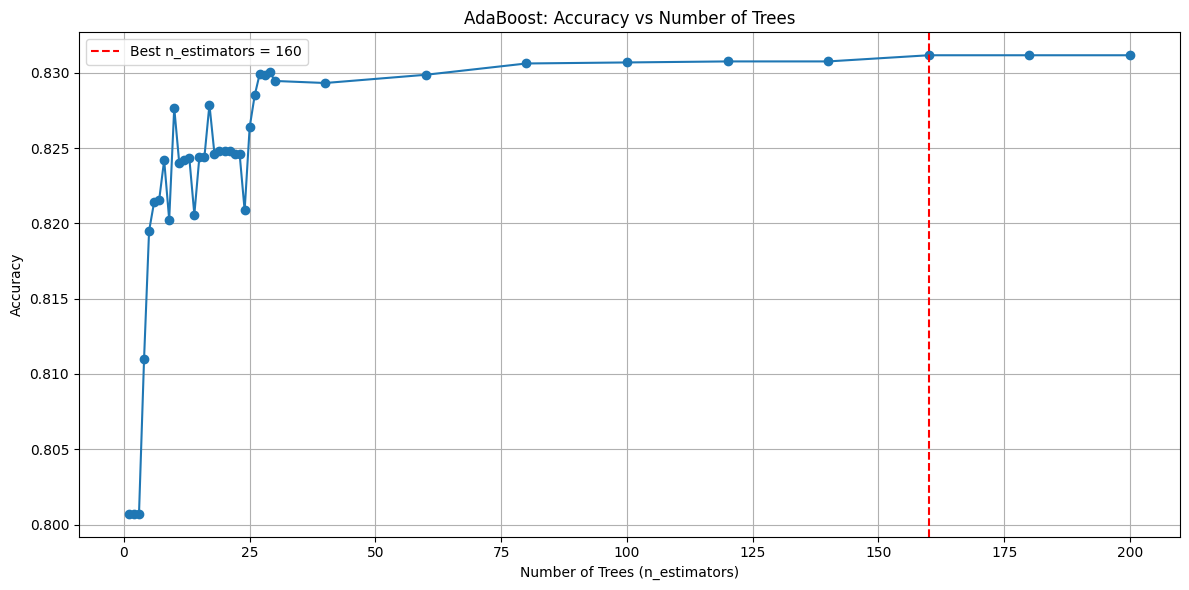

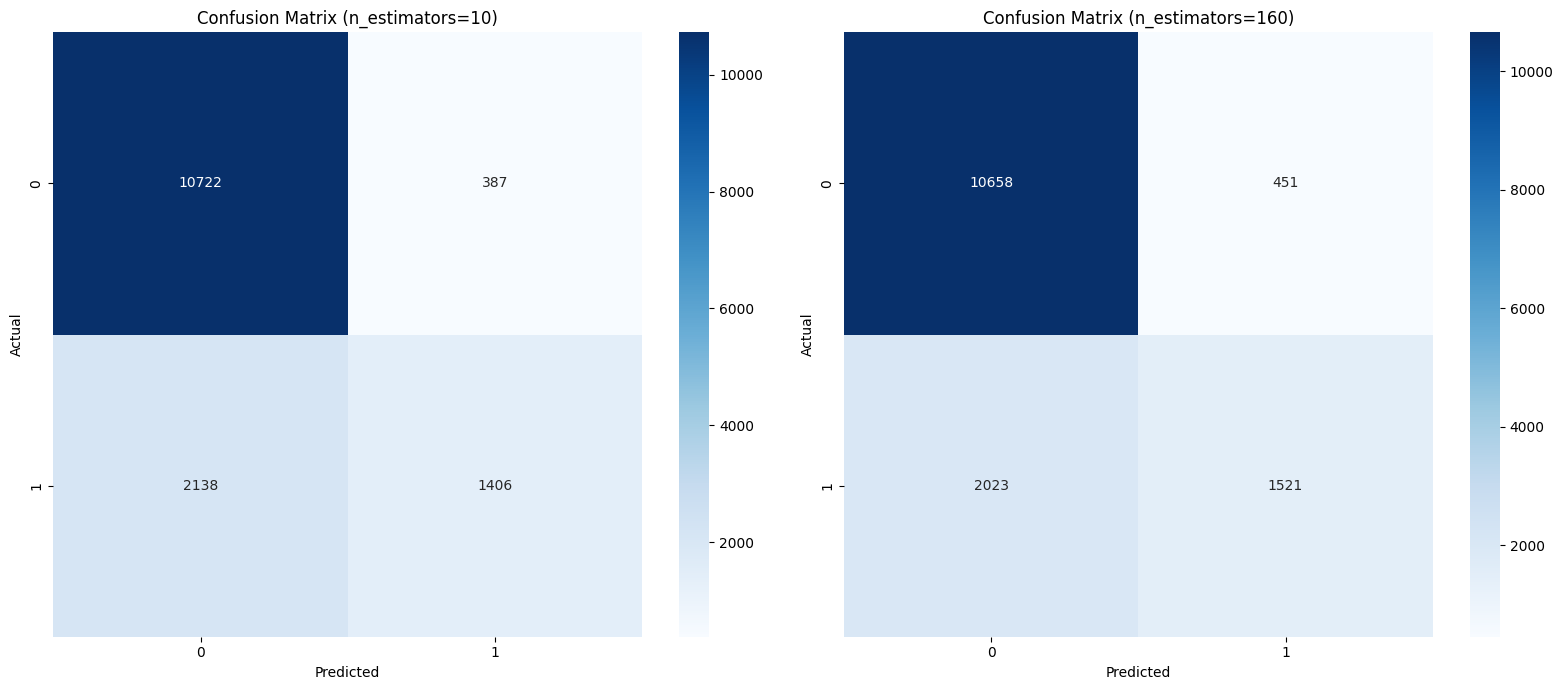

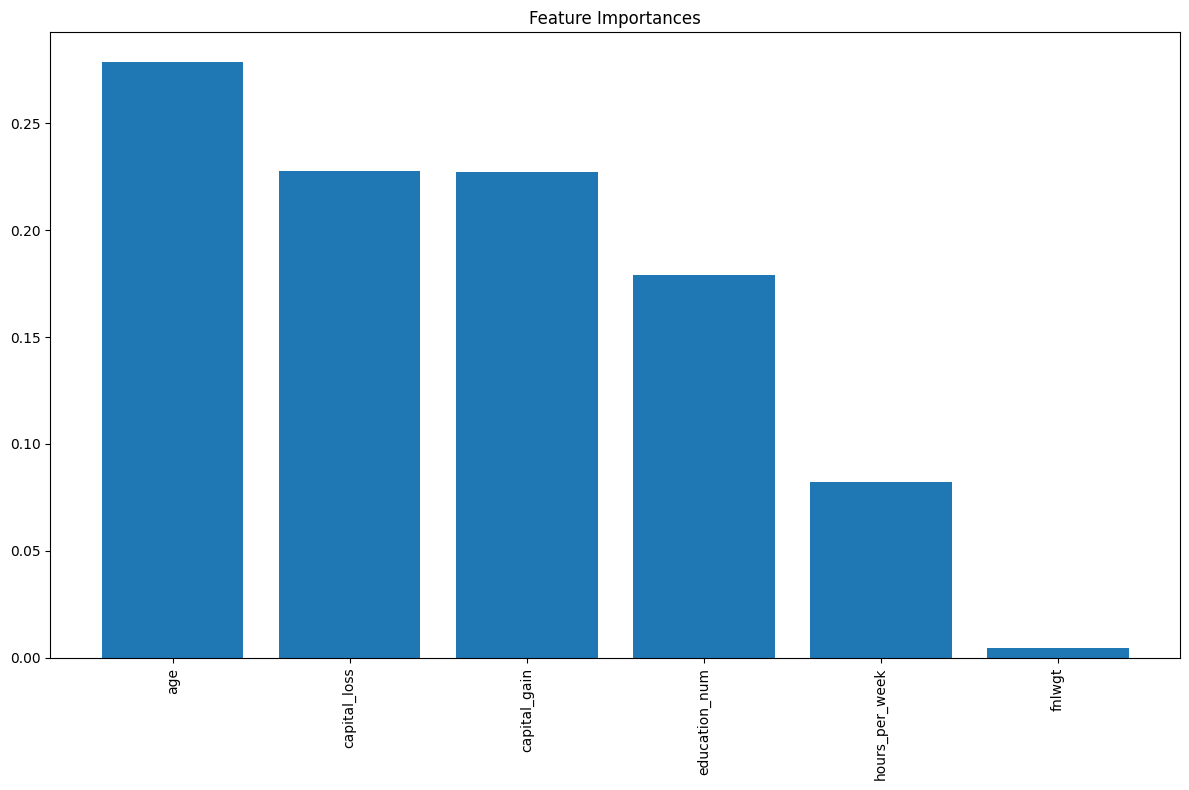


Top 10 Feature Importances:
age: 0.2786
capital_loss: 0.2278
capital_gain: 0.2273
education_num: 0.1792
hours_per_week: 0.0823
fnlwgt: 0.0047


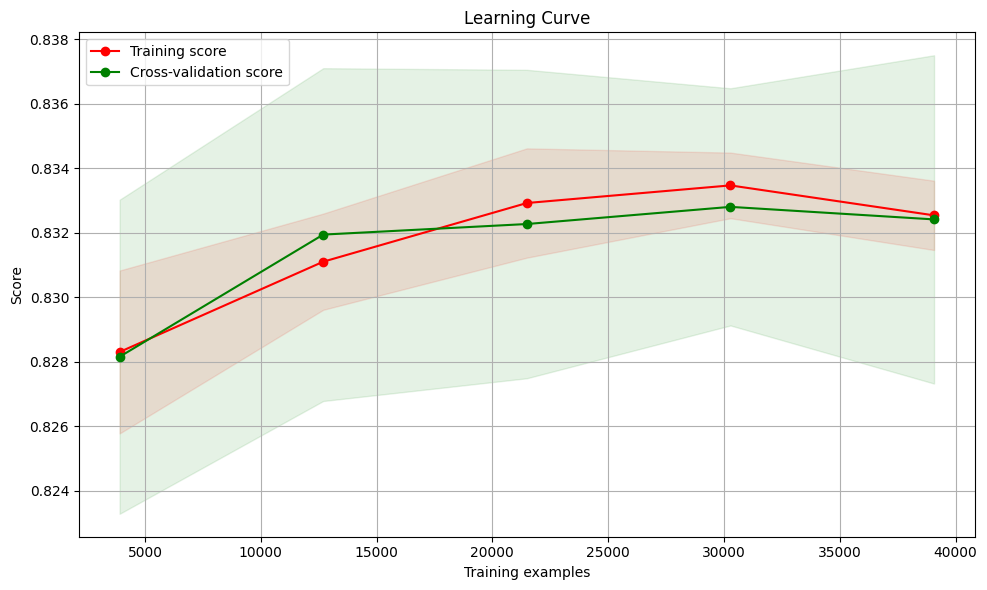


Analysis complete! The best AdaBoost model uses 160 estimators with an accuracy of 0.8311608544325394


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Income dataset
print("Loading dataset...")
try:
    # Try to load the dataset
    data = pd.read_csv('/content/income.csv')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # If there's an issue, we'll continue with sample code that will work when the file is available

# Display basic information about the dataset
print("\nDataset preview:")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nColumns:", data.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Data Preprocessing
print("\nData preprocessing...")

# Process categorical columns using Label Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col} with {len(le.classes_)} unique values")

# Split features and target
# Assuming the target column is named 'income' or similar
# Common target column names in income datasets are 'income', 'salary', 'class', etc.
# Let's try to detect it or use a default
target_column = None

# Common target column names in income datasets
possible_target_columns = ['income', 'class', 'salary', 'target', 'label', 'y']
for col in possible_target_columns:
    if col in data.columns:
        target_column = col
        break

if target_column is None:
    # If we can't identify the target, we'll assume it's the last column
    target_column = data.columns[-1]
    print(f"\nCouldn't identify target column, using last column: {target_column}")
else:
    print(f"\nUsing '{target_column}' as the target column")

X = data.drop(target_column, axis=1)
y = data[target_column]

# Check class distribution
print("\nTarget class distribution:")
print(y.value_counts())

# Scale numerical features
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# 1. Build AdaBoost classifier with n_estimators=10
print("\n1. AdaBoost with n_estimators=10:")
# Use estimator instead of base_estimator in newer scikit-learn versions
ada_default = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                n_estimators=10,
                                random_state=42)
ada_default.fit(X_train, y_train)

# Make predictions
y_pred_default = ada_default.predict(X_test)

# Calculate accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with n_estimators=10: {accuracy_default:.4f}")

# Display classification report
print("\nClassification Report (n_estimators=10):")
print(classification_report(y_test, y_pred_default))

# Display confusion matrix
cm_default = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (n_estimators=10):")
print(cm_default)

# 2. Fine-tune the model by changing the number of trees
print("\n2. Fine-tuning by changing number of trees:")

# Try different numbers of trees
n_estimators_range = list(range(1, 31)) + list(range(40, 201, 20))  # More granular for lower values
accuracies = []

for n_estimators in n_estimators_range:
    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                           n_estimators=n_estimators,
                           random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n_estimators}, Accuracy = {acc:.4f}")

# Find the best number of trees
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nBest accuracy: {best_accuracy:.4f} with n_estimators = {best_n_estimators}")

# Train the final model with the best number of trees
ada_best = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=best_n_estimators,
                            random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)

# Display classification report for the best model
print("\nClassification Report (best n_estimators):")
print(classification_report(y_test, y_pred_best))

# Calculate and display confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix for the best model:")
print(cm_best)

# Plot the accuracy vs number of trees
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-')
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label=f'Best n_estimators = {best_n_estimators}')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('AdaBoost: Accuracy vs Number of Trees')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('adaboost_accuracy_vs_trees.png')
plt.show()

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix (n_estimators=10)')

sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'Confusion Matrix (n_estimators={best_n_estimators})')

plt.tight_layout()
plt.savefig('adaboost_confusion_matrices.png')
plt.show()

# Feature importance for the best model
feature_importances = ada_best.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(min(10, X.shape[1])), feature_importances[indices][:10], align='center')
plt.xticks(range(min(10, X.shape[1])), [feature_names[i] for i in indices][:10], rotation=90)
plt.tight_layout()
plt.savefig('adaboost_feature_importance.png')
plt.show()

print("\nTop 10 Feature Importances:")
for i in range(min(10, X.shape[1])):
    print(f"{feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")

# Learning curve visualization
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('adaboost_learning_curve.png')
    return plt

# Plot learning curve for the best model
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(ada_best, X, y, cv=cv)
plt.show()

print("\nAnalysis complete! The best AdaBoost model uses", best_n_estimators, "estimators with an accuracy of", best_accuracy)